In [1]:
# Import all needed libraries and sublibraries

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Using TensorFlow backend.


In [2]:
# load the data
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# count the rows and columns
df.shape

(569, 33)

In [4]:
# get count of empty values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# drop column with missing values
df = df.dropna(axis=1)

In [6]:
# get new count of rows and cols
df.shape

(569, 32)

In [7]:
# get a count of malognant and benign cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

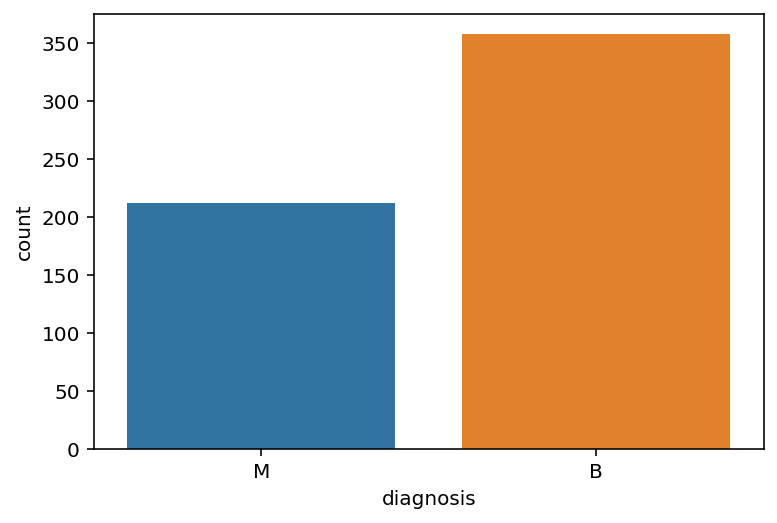

In [8]:
# visualize the data
sns.countplot(df['diagnosis'], label = 'count')

In [9]:
# look at the data types to see witch columns need to be encoded 
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
# Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

/opt/anaconda3/envs/jupyterlab-1.2.3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/envs/jupyterlab-1.2.3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


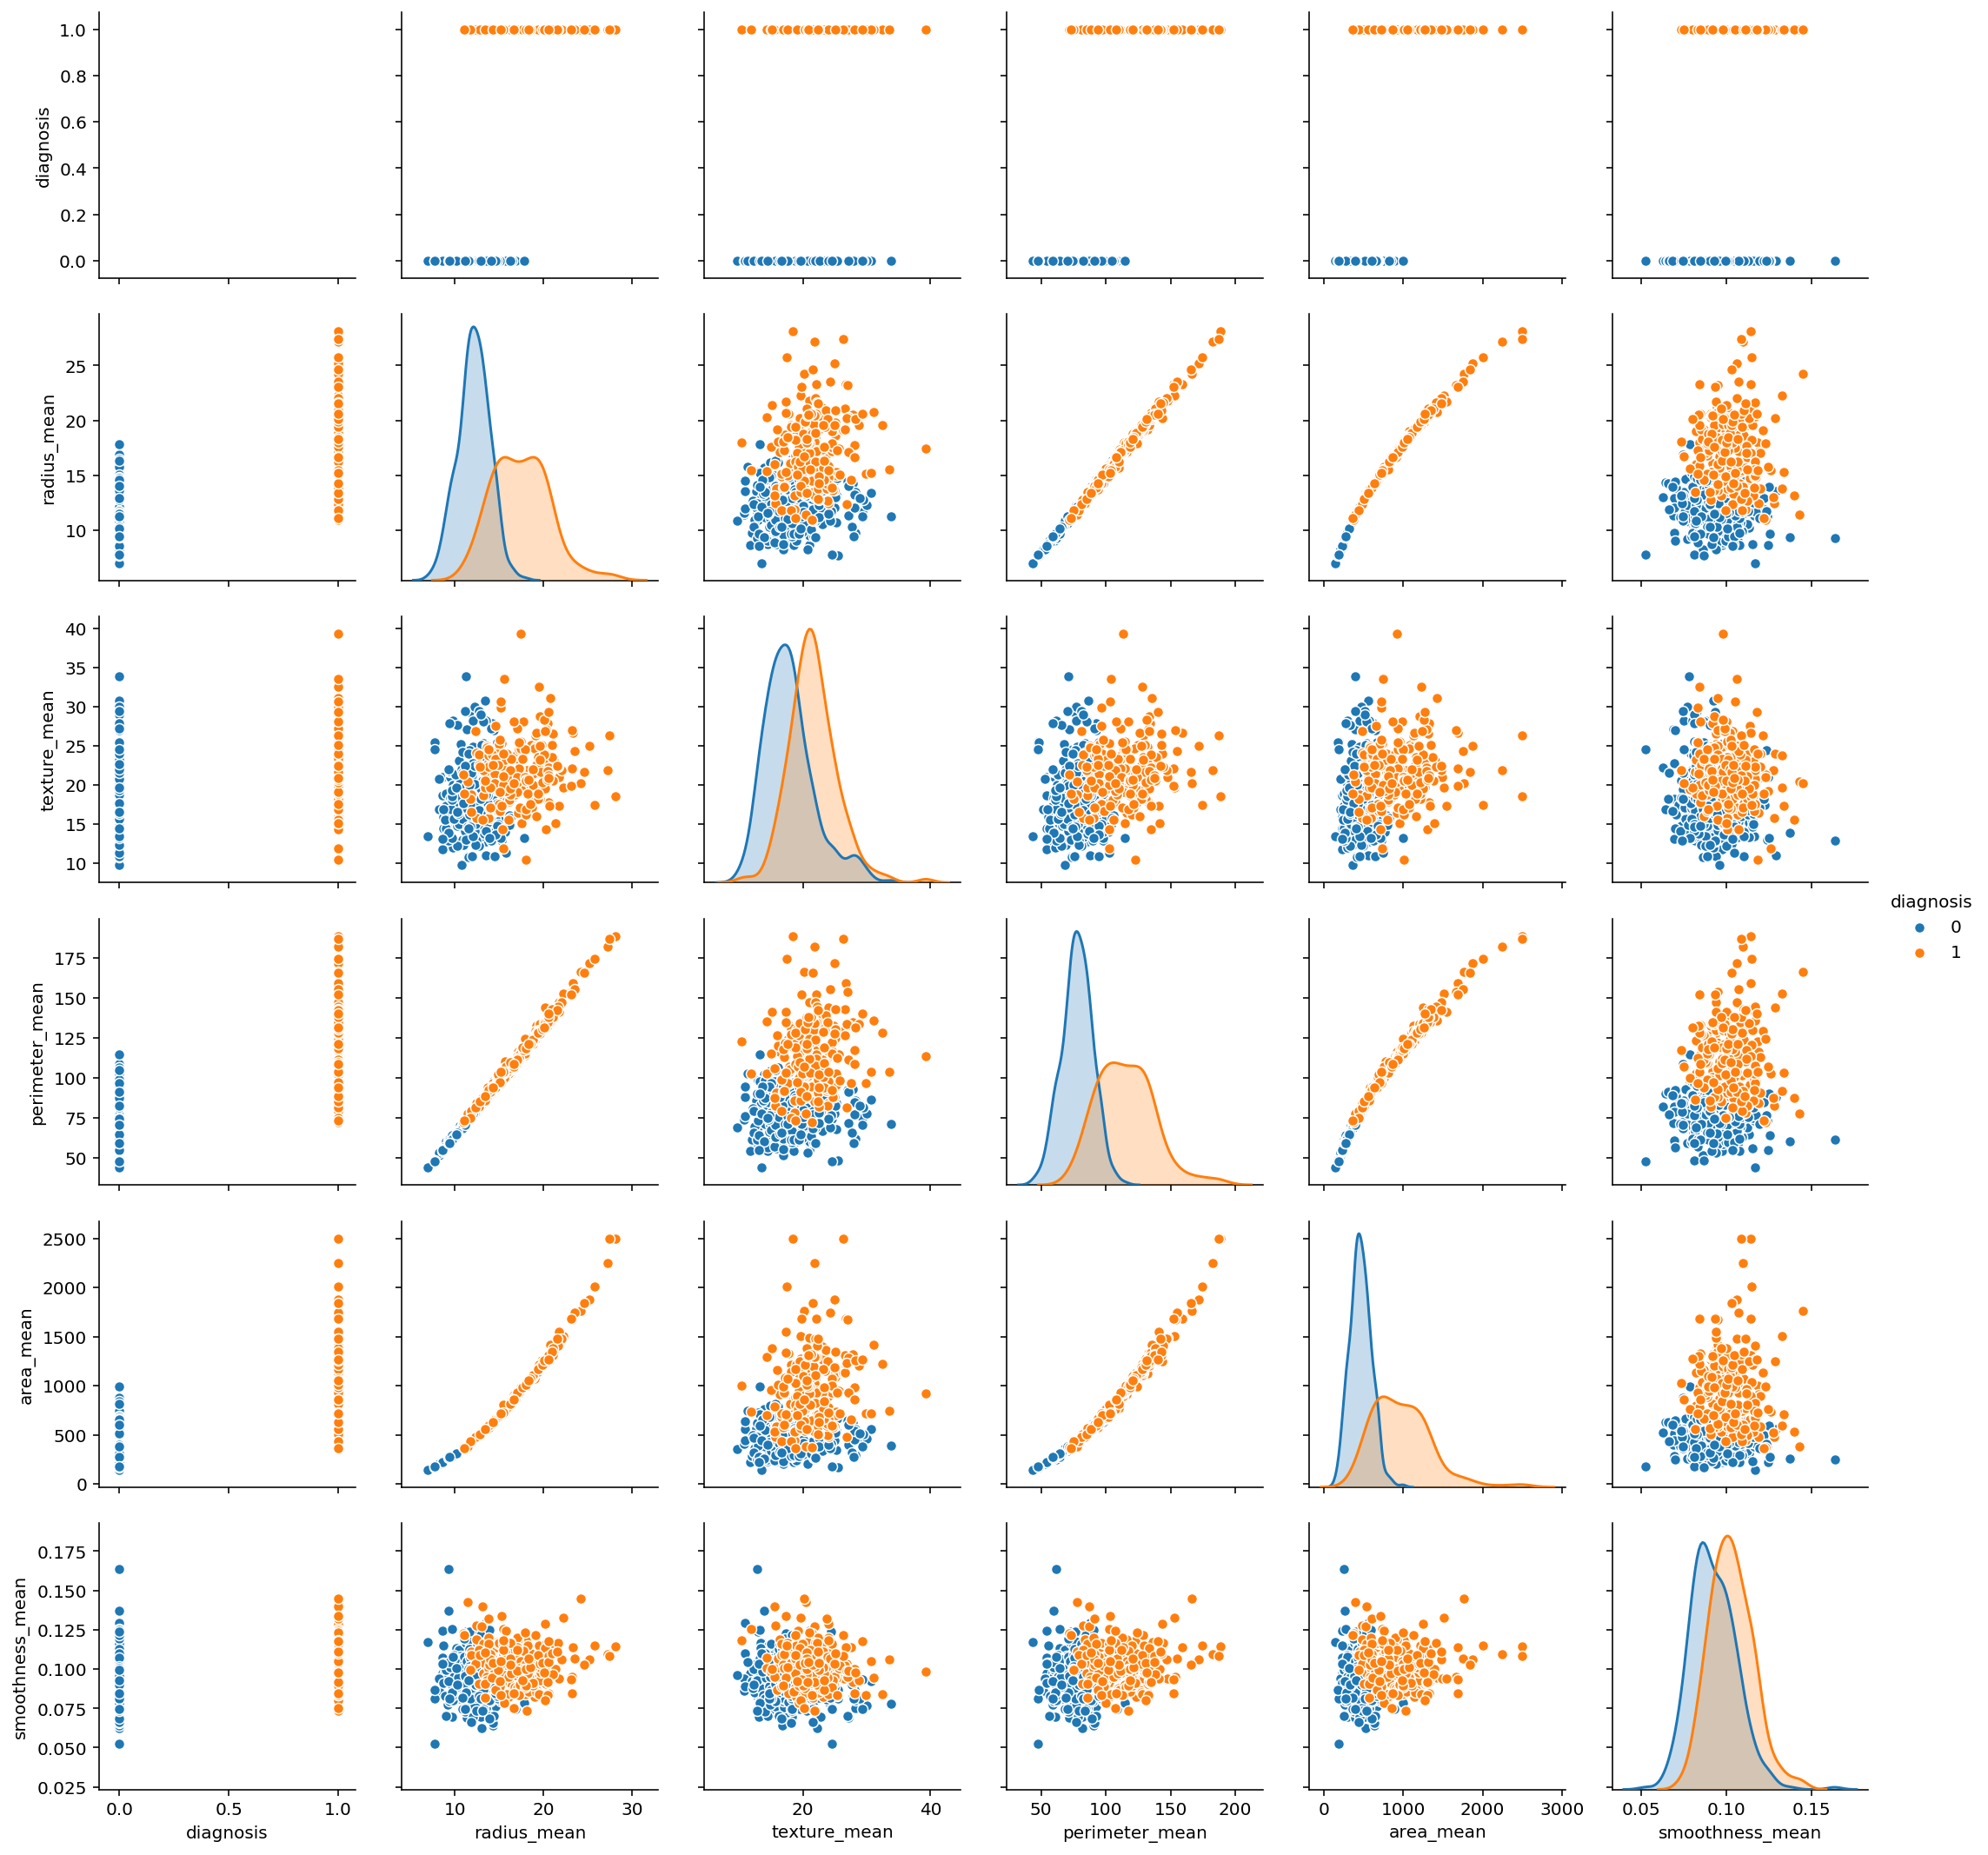

In [11]:
# create a pairplot
sns.pairplot(df.iloc[:,1:7], hue='diagnosis')

In [12]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# Get the correlation between columns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


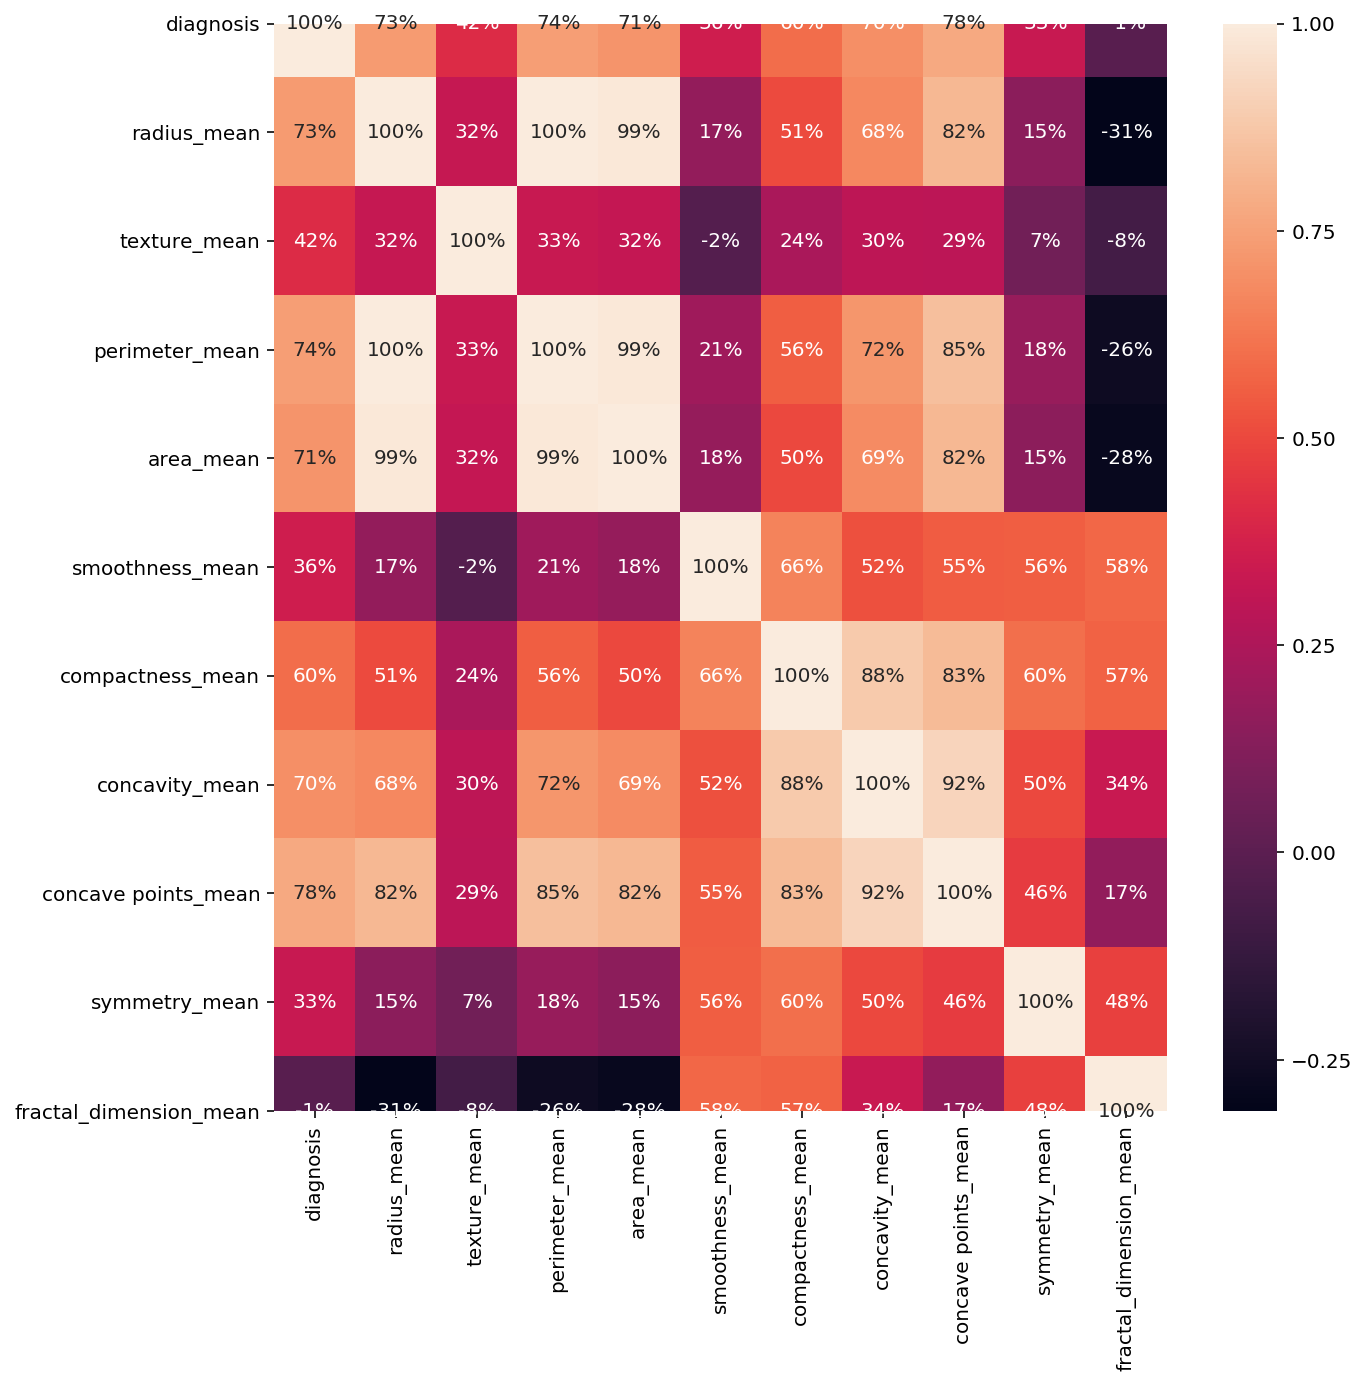

In [14]:
# Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

In [15]:
# Split the data set into independent (X) and dependent (Y) data sets for training and testing
# with training data being 80% of the data, and testing data being the remaining 20% of the data
X = df.iloc[:,1:31].values
Y = df.iloc[:,1].values
Xs = preprocessing.scale(X)
out=pd.DataFrame(Y)
X_train, X_test, y_train, y_test = train_test_split(Xs, out, test_size=0.2)

In [45]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 1.29767572  0.4892736   1.08449508 ... -0.19184569 -0.04120657
  -0.14844061]
 [-0.77060855 -0.76038886  0.39102907 ... -0.46386527 -0.8121292
  -0.2244763 ]
 [ 1.29767572  0.83293078  0.39801027 ...  0.57479857  1.03683652
  -0.44934781]
 ...
 [ 1.29767572  2.16495736  0.39568321 ...  1.48009126  1.05815376
  -0.10961388]
 [-0.77060855 -0.0049111  -1.49156823 ... -1.05122608 -0.84821623
  -1.29544706]
 [ 1.29767572  0.03485089  0.66562299 ...  2.01501513  0.97288481
  -0.09181829]]
[[-0.77060855 -0.71494659 -0.76086916 ... -0.20144074 -0.06252381
  -0.18403178]
 [-0.77060855 -0.19236047 -0.23029785 ... -0.64329265 -0.5404867
  -0.36036987]
 [ 1.29767572  0.38702849  0.15832236 ...  1.35823416  1.48449849
   0.46308046]
 ...
 [ 1.29767572  0.23366083 -0.40017375 ...  0.30373849  0.79321097
   0.83031666]
 [-0.77060855 -0.65814375 -0.44206096 ... -0.88350466 -1.08940554
   0.48411161]
 [-0.77060855 -0.30596615  0.00473593 ... -1.29697922 -1.57589532
  -0.74701944]]
     0
13   1
80  

In [ ]:
# Define a "shallow" logistic regression model

model = Sequential()

model.add(Dense(13,input_shape=(30,), activation='sigmoid',
               activity_regularizer =regularizers.l1(1e-4)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [18]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history

history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])

history_dict=history.history

Epoch 00389: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

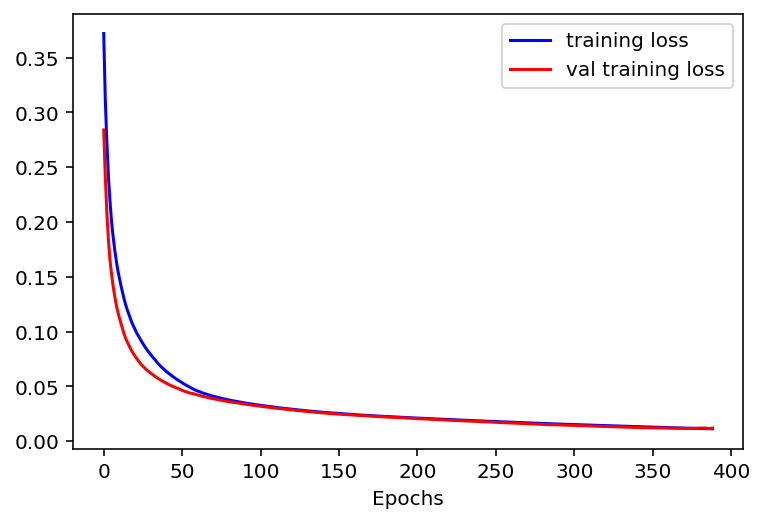

In [19]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

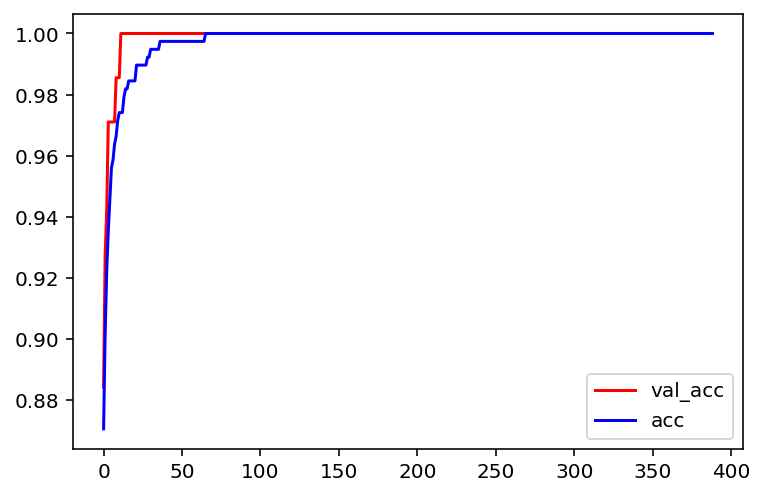

In [20]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-r',label='val_acc')
plt.plot(accuracy_values,'-b',label='acc')
plt.legend()

In [21]:
# Calculate loss and accuracy of testing data
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 31us/step
Test loss:  0.01141601748633803
Test accuracy:  1.0


In [22]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  1.0


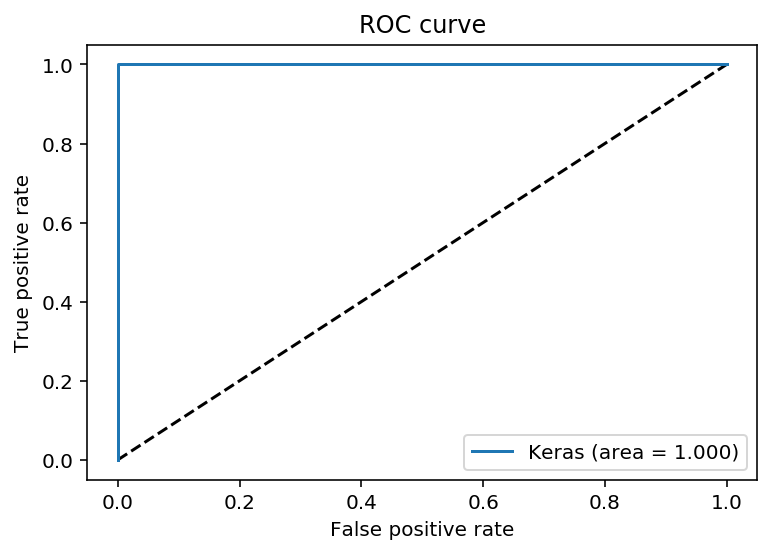

In [23]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [24]:
# AUC score of training data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train,y_train_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Training data AUC: ', auc_keras)

Training data AUC:  1.0


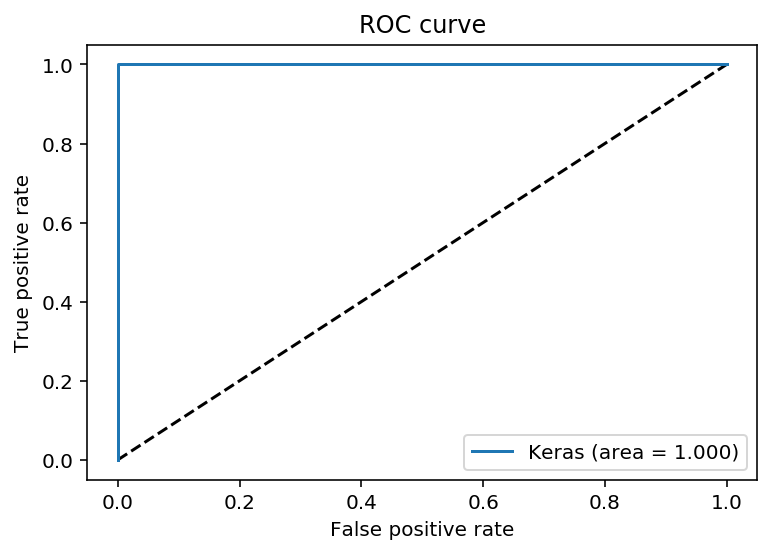

In [25]:
# ROC curve of training data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [26]:
# Make y_train categorical and assign this to y_train_cat
y_train_cat = to_categorical(y_train)


In [27]:
#Define a "shallow" softmax regression model

model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics = ['accuracy'])

In [28]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history
history = model.fit(X_train, y_train_cat, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])

history_dict=history.history

Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

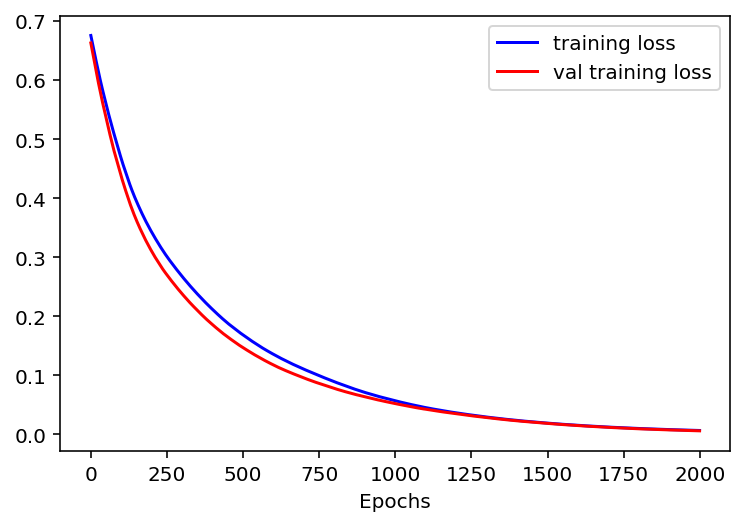

In [29]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

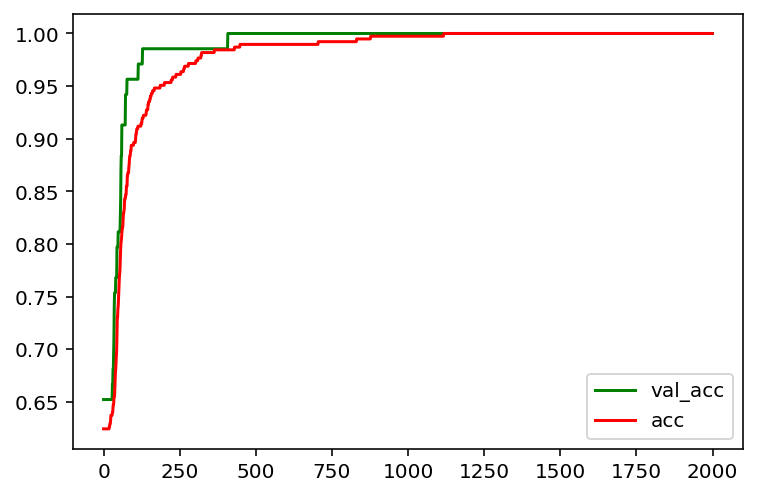

In [30]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-g',label='val_acc')
plt.plot(accuracy_values,'-r',label='acc')
plt.legend()

In [31]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 41us/step
Test loss:  0.03376620632122483
Test accuracy:  0.9912280701754386


In [32]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  1.0


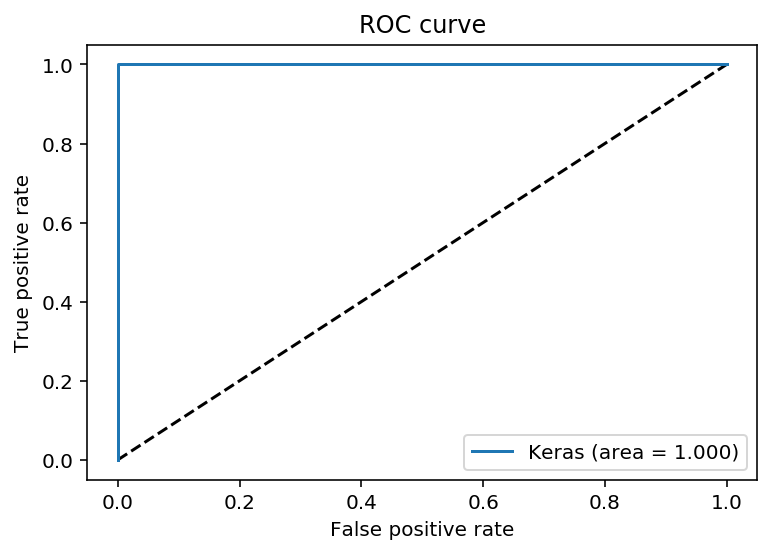

In [33]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [34]:
# AUC score of training data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  1.0


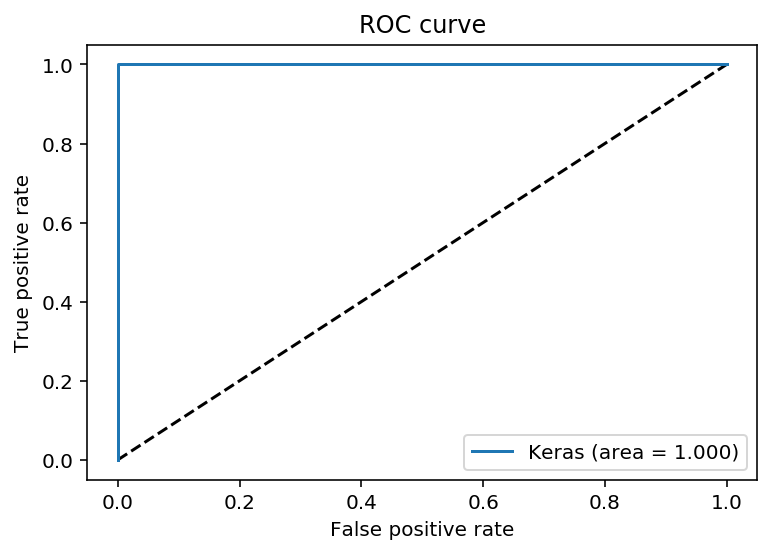

In [35]:
# ROC curve of training data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [36]:
# Define a "deep" softmax regression model
model = Sequential()

model.add(Dense(13,input_shape=(30,), activation='softmax',
               activity_regularizer =regularizers.l1(1e-4)))
model.add(Dense(13, activation='softmax',
               activity_regularizer =regularizers.l1(1e-4)))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [37]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history
history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history

Epoch 01903: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

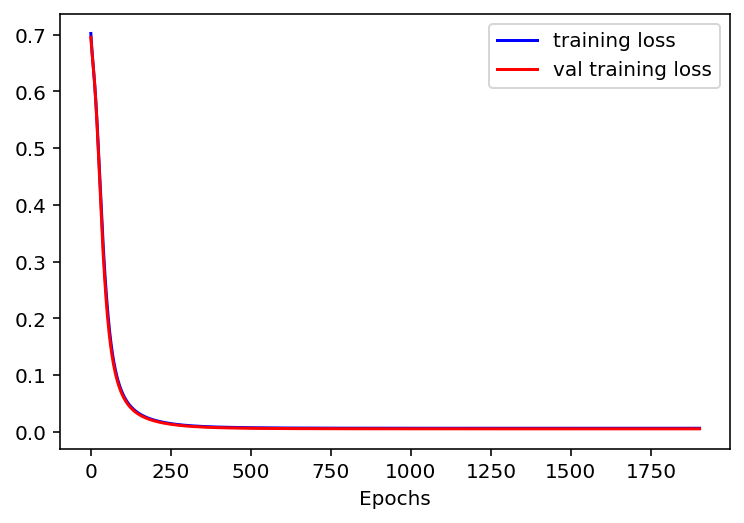

In [38]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

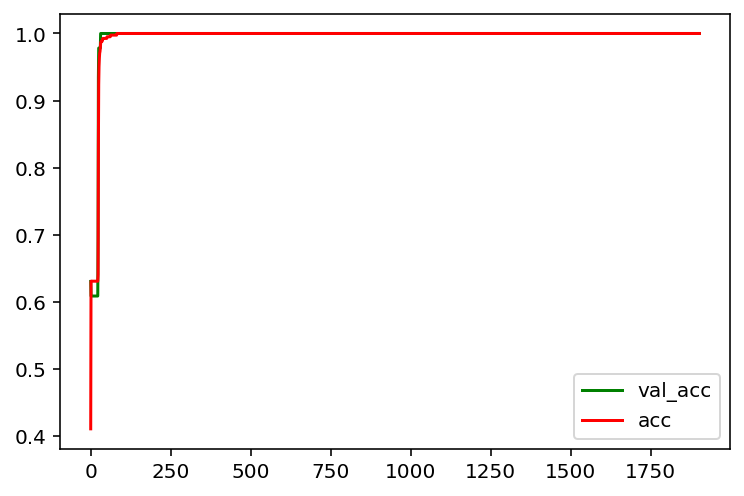

In [39]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-g',label='val_acc')
plt.plot(accuracy_values,'-r',label='acc')
plt.legend()

In [40]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 44us/step
Test loss:  0.04799548827373145
Test accuracy:  0.9912280701754386


In [41]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  1.0


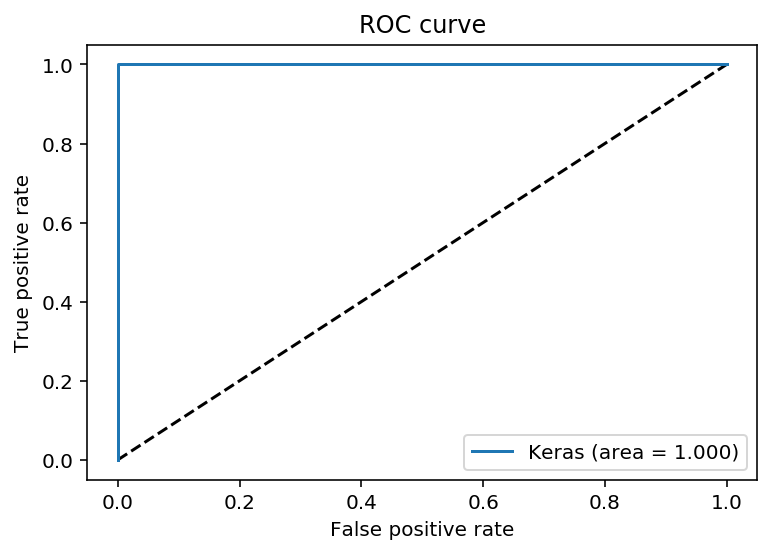

In [42]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [43]:
#  AUC score of training data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  1.0


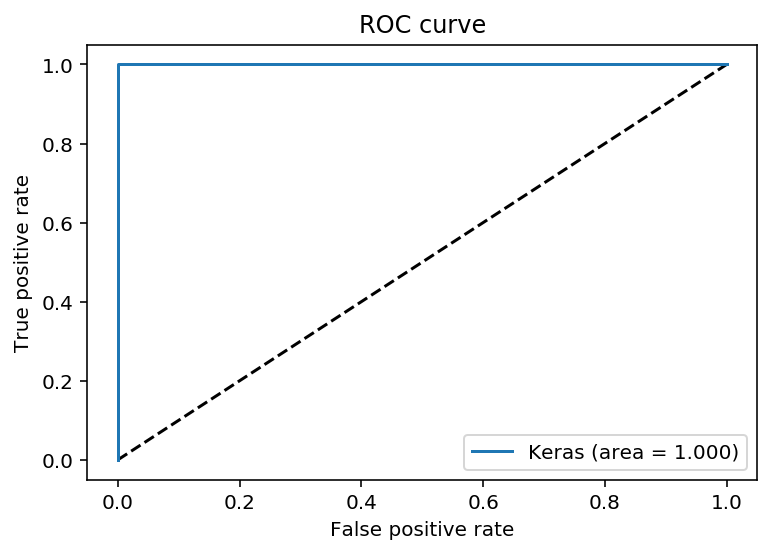

In [44]:
# ROC curve of training data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()